In [1]:
# Import libraries
# 1. Introduction to the Dataset
import pandas as pd
import numpy as np

In [2]:
# 2. Data Loading
# This load the dataset
file_path = "pizza_sales.csv"
dataframe = pd.read_csv("C:\\Users\\antho\\OneDrive\\Desktop\\Data Mining\\Project2\\pizza_sales.csv", index_col=0)

In [3]:
print("First 5 rows of the dataset:")
dataframe.head()

First 5 rows of the dataset:


order_id  pizza_name_id  quantity order_date order_time  unit_price  \
pizza_id                                                                        
1.0            1.0     hawaiian_m       1.0   1/1/2015   11:38:36       13.25   
2.0            2.0  classic_dlx_m       1.0   1/1/2015   11:57:40       16.00   
3.0            2.0  five_cheese_l       1.0   1/1/2015   11:57:40       18.50   
4.0            2.0    ital_supr_l       1.0   1/1/2015   11:57:40       20.75   
5.0            2.0     mexicana_m       1.0   1/1/2015   11:57:40       16.00   

          total_price pizza_size pizza_category  \
pizza_id                                          
1.0             13.25          M        Classic   
2.0             16.00          M        Classic   
3.0             18.50          L         Veggie   
4.0             20.75          L        Supreme   
5.0             16.00          M         Veggie   

                                          pizza_ingredients  \
pizza_id                                                      
1.0                Sliced Ham, Pineapple, Mozzarella Cheese   
2.0       Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
3.0       Mozzarella Cheese, Provolone Cheese, Smoked Go...   
4.0       Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
5.0       Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                         pizza_name  
pizza_id                             
1.0              The Hawaiian Pizza  
2.0        The Classic Deluxe Pizza  
3.0           The Five Cheese Pizza  
4.0       The Italian Supreme Pizza  
5.0              The Mexicana Pizza

In [4]:
# 3. Preliminary Data Exploration
# This is a summary of the dataset
print("\nSummary of the dataset:")
dataframe.info()


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Float64Index: 48620 entries, 1.0 to 48620.0
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           48620 non-null  float64
 1   pizza_name_id      48620 non-null  object 
 2   quantity           48620 non-null  float64
 3   order_date         48620 non-null  object 
 4   order_time         48620 non-null  object 
 5   unit_price         48620 non-null  float64
 6   total_price        48620 non-null  float64
 7   pizza_size         48620 non-null  object 
 8   pizza_category     48620 non-null  object 
 9   pizza_ingredients  48620 non-null  object 
 10  pizza_name         48620 non-null  object 
dtypes: float64(4), object(7)
memory usage: 4.5+ MB


In [5]:
# This is to check missing values of the dataset
print("\nMissing values in the dataset:")
dataframe.isnull().sum()


Missing values in the dataset:


order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
# 4. Data Cleaning and Preparation
# This method is for handling missing values
#dataframe.fillna(dataset.mean(), inplace=True)

In [7]:
# This method is for drop missing values
#dataframe.df.dropna()

In [8]:
# Convert order_date to datetime
dataframe['order_date'] = pd.to_datetime(dataframe['order_date'])
dataframe['order_time'] = pd.to_datetime(dataframe['order_time'])

C:\Users\antho\AppData\Local\Temp\ipykernel_17928\1298331056.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['order_date'] = pd.to_datetime(dataframe['order_date'])


In [9]:
# Due to the ordertime being associated with the today's date, code for associated with its actual date
dataframe['order_time'] = pd.to_datetime(dataframe['order_date'].dt.strftime('%Y-%m-%d') + ' ' + dataframe['order_time'].dt.strftime('%H:%M:%S'))

In [10]:
# Dropping duplicate columns in the dataframe
dataframe.drop(columns=['unit_price'], inplace=True)
dataframe.drop(columns=['order_date'], inplace=True)

In [11]:
# Show new dataframe - first five
dataframe.head()

order_id  pizza_name_id  quantity          order_time  total_price  \
pizza_id                                                                       
1.0            1.0     hawaiian_m       1.0 2015-01-01 11:38:36        13.25   
2.0            2.0  classic_dlx_m       1.0 2015-01-01 11:57:40        16.00   
3.0            2.0  five_cheese_l       1.0 2015-01-01 11:57:40        18.50   
4.0            2.0    ital_supr_l       1.0 2015-01-01 11:57:40        20.75   
5.0            2.0     mexicana_m       1.0 2015-01-01 11:57:40        16.00   

         pizza_size pizza_category  \
pizza_id                             
1.0               M        Classic   
2.0               M        Classic   
3.0               L         Veggie   
4.0               L        Supreme   
5.0               M         Veggie   

                                          pizza_ingredients  \
pizza_id                                                      
1.0                Sliced Ham, Pineapple, Mozzarella Cheese   
2.0       Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
3.0       Mozzarella Cheese, Provolone Cheese, Smoked Go...   
4.0       Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
5.0       Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                         pizza_name  
pizza_id                             
1.0              The Hawaiian Pizza  
2.0        The Classic Deluxe Pizza  
3.0           The Five Cheese Pizza  
4.0       The Italian Supreme Pizza  
5.0              The Mexicana Pizza

In [12]:
# Show new dataframe - last five
dataframe.tail()

order_id  pizza_name_id  quantity          order_time  total_price  \
pizza_id                                                                       
48616.0    21348.0  ckn_alfredo_m       1.0 2015-12-31 21:23:10        16.75   
48617.0    21348.0  four_cheese_l       1.0 2015-12-31 21:23:10        17.95   
48618.0    21348.0   napolitana_s       1.0 2015-12-31 21:23:10        12.00   
48619.0    21349.0     mexicana_l       1.0 2015-12-31 22:09:54        20.25   
48620.0    21350.0      bbq_ckn_s       1.0 2015-12-31 23:02:05        12.75   

         pizza_size pizza_category  \
pizza_id                             
48616.0           M        Chicken   
48617.0           L         Veggie   
48618.0           S        Classic   
48619.0           L         Veggie   
48620.0           S        Chicken   

                                          pizza_ingredients  \
pizza_id                                                      
48616.0   Chicken, Red Onions, Red Peppers, Mushrooms, A...   
48617.0   Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...   
48618.0   Tomatoes, Anchovies, Green Olives, Red Onions,...   
48619.0   Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
48620.0   Barbecued Chicken, Red Peppers, Green Peppers,...   

                          pizza_name  
pizza_id                              
48616.0    The Chicken Alfredo Pizza  
48617.0        The Four Cheese Pizza  
48618.0         The Napolitana Pizza  
48619.0           The Mexicana Pizza  
48620.0   The Barbecue Chicken Pizza

In [13]:
# 5. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt 
import seaborn as sns

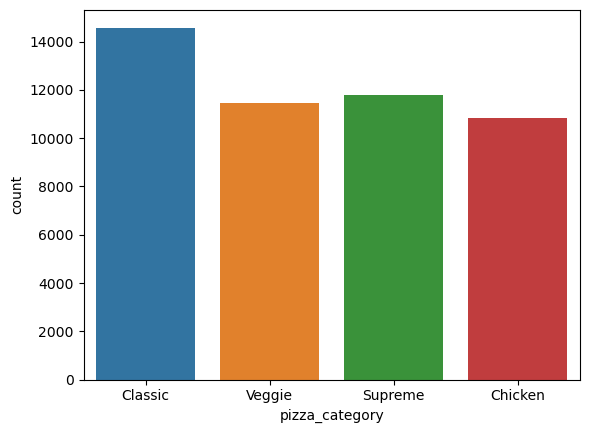

In [14]:
# Show pizza category and amount sold
sns.countplot(x='pizza_category', data=dataframe) 
plt.show()

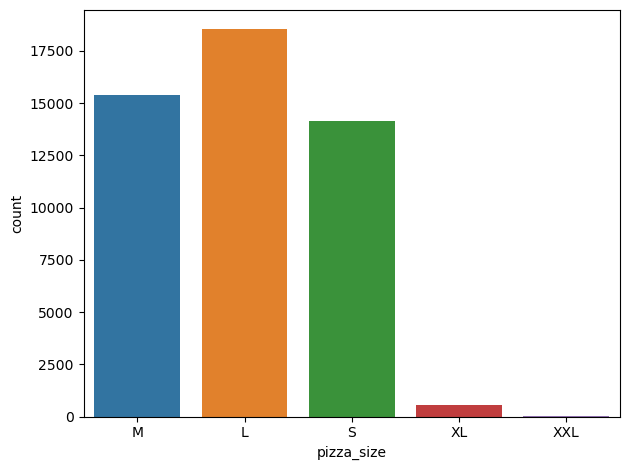

In [15]:
# Show pizza size and how many are sold
sns.countplot(x='pizza_size', data=dataframe)
plt.tight_layout()
plt.show()

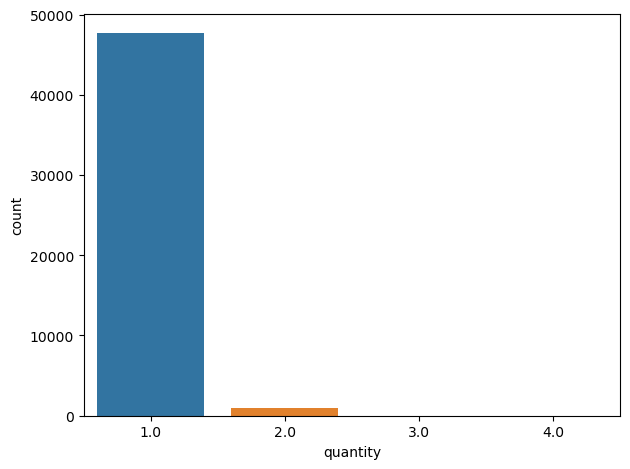

In [16]:
# Show the quanity sold each time
sns.countplot(x='quantity', data=dataframe)
plt.tight_layout()
plt.show()

In [17]:
# Show the mean of the price being sold
mean_total_price = dataframe['total_price'].mean()
print("Mean Total Price:", mean_total_price)

Mean Total Price: 16.821473673385437


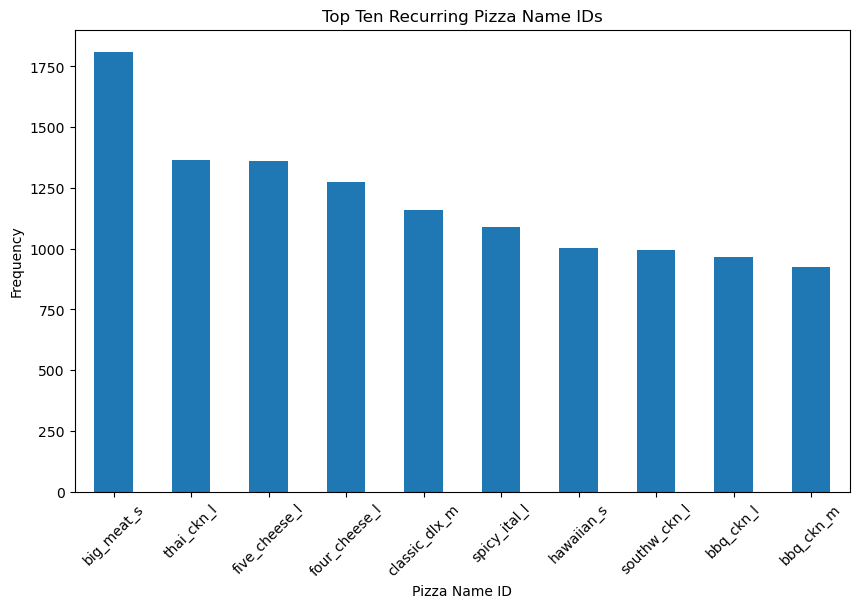

In [18]:
# Show the top ten pizza type and size being sold
top_ten_recurring_pizza_name_id = dataframe['pizza_name_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_ten_recurring_pizza_name_id.plot(kind='bar')
plt.title('Top Ten Recurring Pizza Name IDs')
plt.xlabel('Pizza Name ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\antho\AppData\Local\Temp\ipykernel_17928\394804945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_df['average_cost_per_pizza'] = top_ten_df['total_price'] / top_ten_df['quantity']


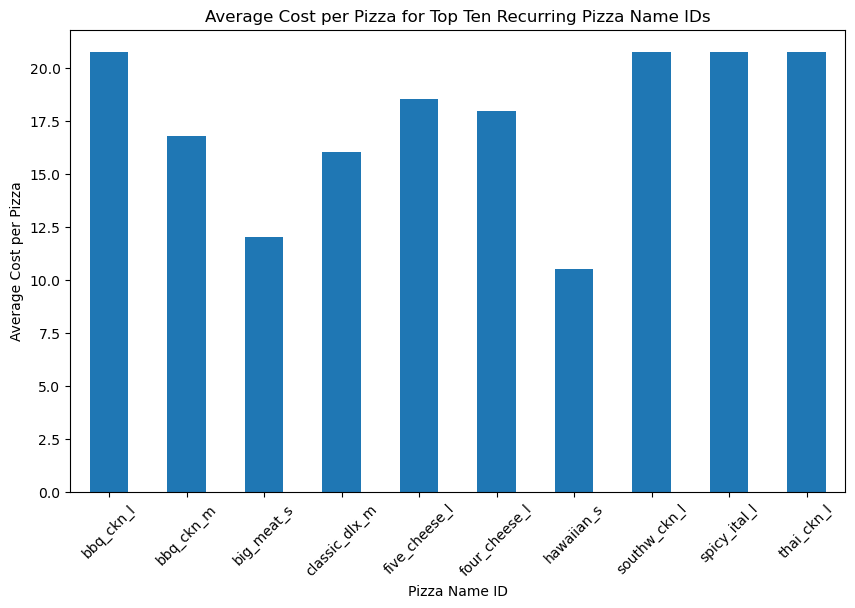

In [19]:
# Show the average price being sold by the quanity
top_ten_recurring_pizza_name_id = dataframe['pizza_name_id'].value_counts().head(10).index.tolist()
top_ten_df = dataframe[dataframe['pizza_name_id'].isin(top_ten_recurring_pizza_name_id)]

top_ten_df['average_cost_per_pizza'] = top_ten_df['total_price'] / top_ten_df['quantity']

grouped_average_cost = top_ten_df.groupby('pizza_name_id')['average_cost_per_pizza'].mean()

plt.figure(figsize=(10, 6))
grouped_average_cost.plot(kind='bar')
plt.title('Average Cost per Pizza for Top Ten Recurring Pizza Name IDs')
plt.xlabel('Pizza Name ID')
plt.ylabel('Average Cost per Pizza')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Show the top ten pizza and their ingredients
top_ten_recurring_pizza_name_id = dataframe['pizza_name_id'].value_counts().head(10).index.tolist()
top_ten_df = dataframe[dataframe['pizza_name_id'].isin(top_ten_recurring_pizza_name_id)]

pizza_ingredients_dict = {}

for pizza_id in top_ten_recurring_pizza_name_id:
    pizza_ingredients = top_ten_df[top_ten_df['pizza_name_id'] == pizza_id]['pizza_ingredients'].iloc[0]
    pizza_ingredients = pizza_ingredients.split(', ')
    pizza_ingredients_dict[pizza_id] = pizza_ingredients

for pizza_id, ingredients in pizza_ingredients_dict.items():
    print(f"Pizza Name ID: {pizza_id}")
    print("Ingredients:")
    for ingredient in ingredients:
        print(f"- {ingredient}")
    print()

Pizza Name ID: big_meat_s
Ingredients:
- Bacon
- Pepperoni
- Italian Sausage
- Chorizo Sausage

Pizza Name ID: thai_ckn_l
Ingredients:
- Chicken
- Pineapple
- Tomatoes
- Red Peppers
- Thai Sweet Chilli Sauce

Pizza Name ID: five_cheese_l
Ingredients:
- Mozzarella Cheese
- Provolone Cheese
- Smoked Gouda Cheese
- Romano Cheese
- Blue Cheese
- Garlic

Pizza Name ID: four_cheese_l
Ingredients:
- Ricotta Cheese
- Gorgonzola Piccante Cheese
- Mozzarella Cheese
- Parmigiano Reggiano Cheese
- Garlic

Pizza Name ID: classic_dlx_m
Ingredients:
- Pepperoni
- Mushrooms
- Red Onions
- Red Peppers
- Bacon

Pizza Name ID: spicy_ital_l
Ingredients:
- Capocollo
- Tomatoes
- Goat Cheese
- Artichokes
- Peperoncini verdi
- Garlic

Pizza Name ID: hawaiian_s
Ingredients:
- Sliced Ham
- Pineapple
- Mozzarella Cheese

Pizza Name ID: southw_ckn_l
Ingredients:
- Chicken
- Tomatoes
- Red Peppers
- Red Onions
- Jalapeno Peppers
- Corn
- Cilantro
- Chipotle Sauce

Pizza Name ID: bbq_ckn_l
Ingredients:
- Barbecued

In [21]:
# Show the name of the type of pizza
pizza_names = dataframe['pizza_name'].unique()
print(pizza_names)

['The Hawaiian Pizza' 'The Classic Deluxe Pizza' 'The Five Cheese Pizza'
 'The Italian Supreme Pizza' 'The Mexicana Pizza' 'The Thai Chicken Pizza'
 'The Prosciutto and Arugula Pizza' 'The Barbecue Chicken Pizza'
 'The Greek Pizza' 'The Spinach Supreme Pizza' 'The Green Garden Pizza'
 'The Italian Capocollo Pizza' 'The Spicy Italian Pizza'
 'The Spinach Pesto Pizza' 'The Vegetables + Vegetables Pizza'
 'The Southwest Chicken Pizza' 'The California Chicken Pizza'
 'The Pepperoni Pizza' 'The Chicken Pesto Pizza' 'The Big Meat Pizza'
 'The Soppressata Pizza' 'The Four Cheese Pizza' 'The Napolitana Pizza'
 'The Calabrese Pizza' 'The Italian Vegetables Pizza'
 'The Mediterranean Pizza' 'The Pepper Salami Pizza'
 'The Spinach and Feta Pizza' 'The Sicilian Pizza'
 'The Chicken Alfredo Pizza' 'The Pepperoni, Mushroom, and Peppers Pizza'
 'The Brie Carre Pizza']


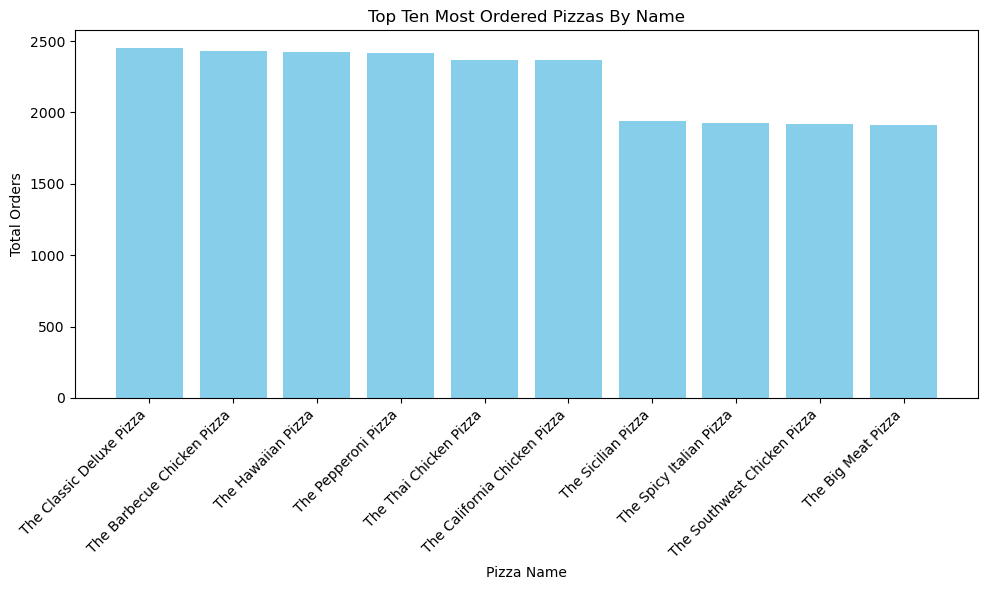

In [22]:
# Show the top ten type of pizza ordered
pizza_orders = dataframe.groupby('pizza_name')['quantity'].sum().reset_index()

top_ten_pizzas = pizza_orders.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_ten_pizzas['pizza_name'], top_ten_pizzas['quantity'], color='skyblue')
plt.xlabel('Pizza Name')
plt.ylabel('Total Orders')
plt.title('Top Ten Most Ordered Pizzas By Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

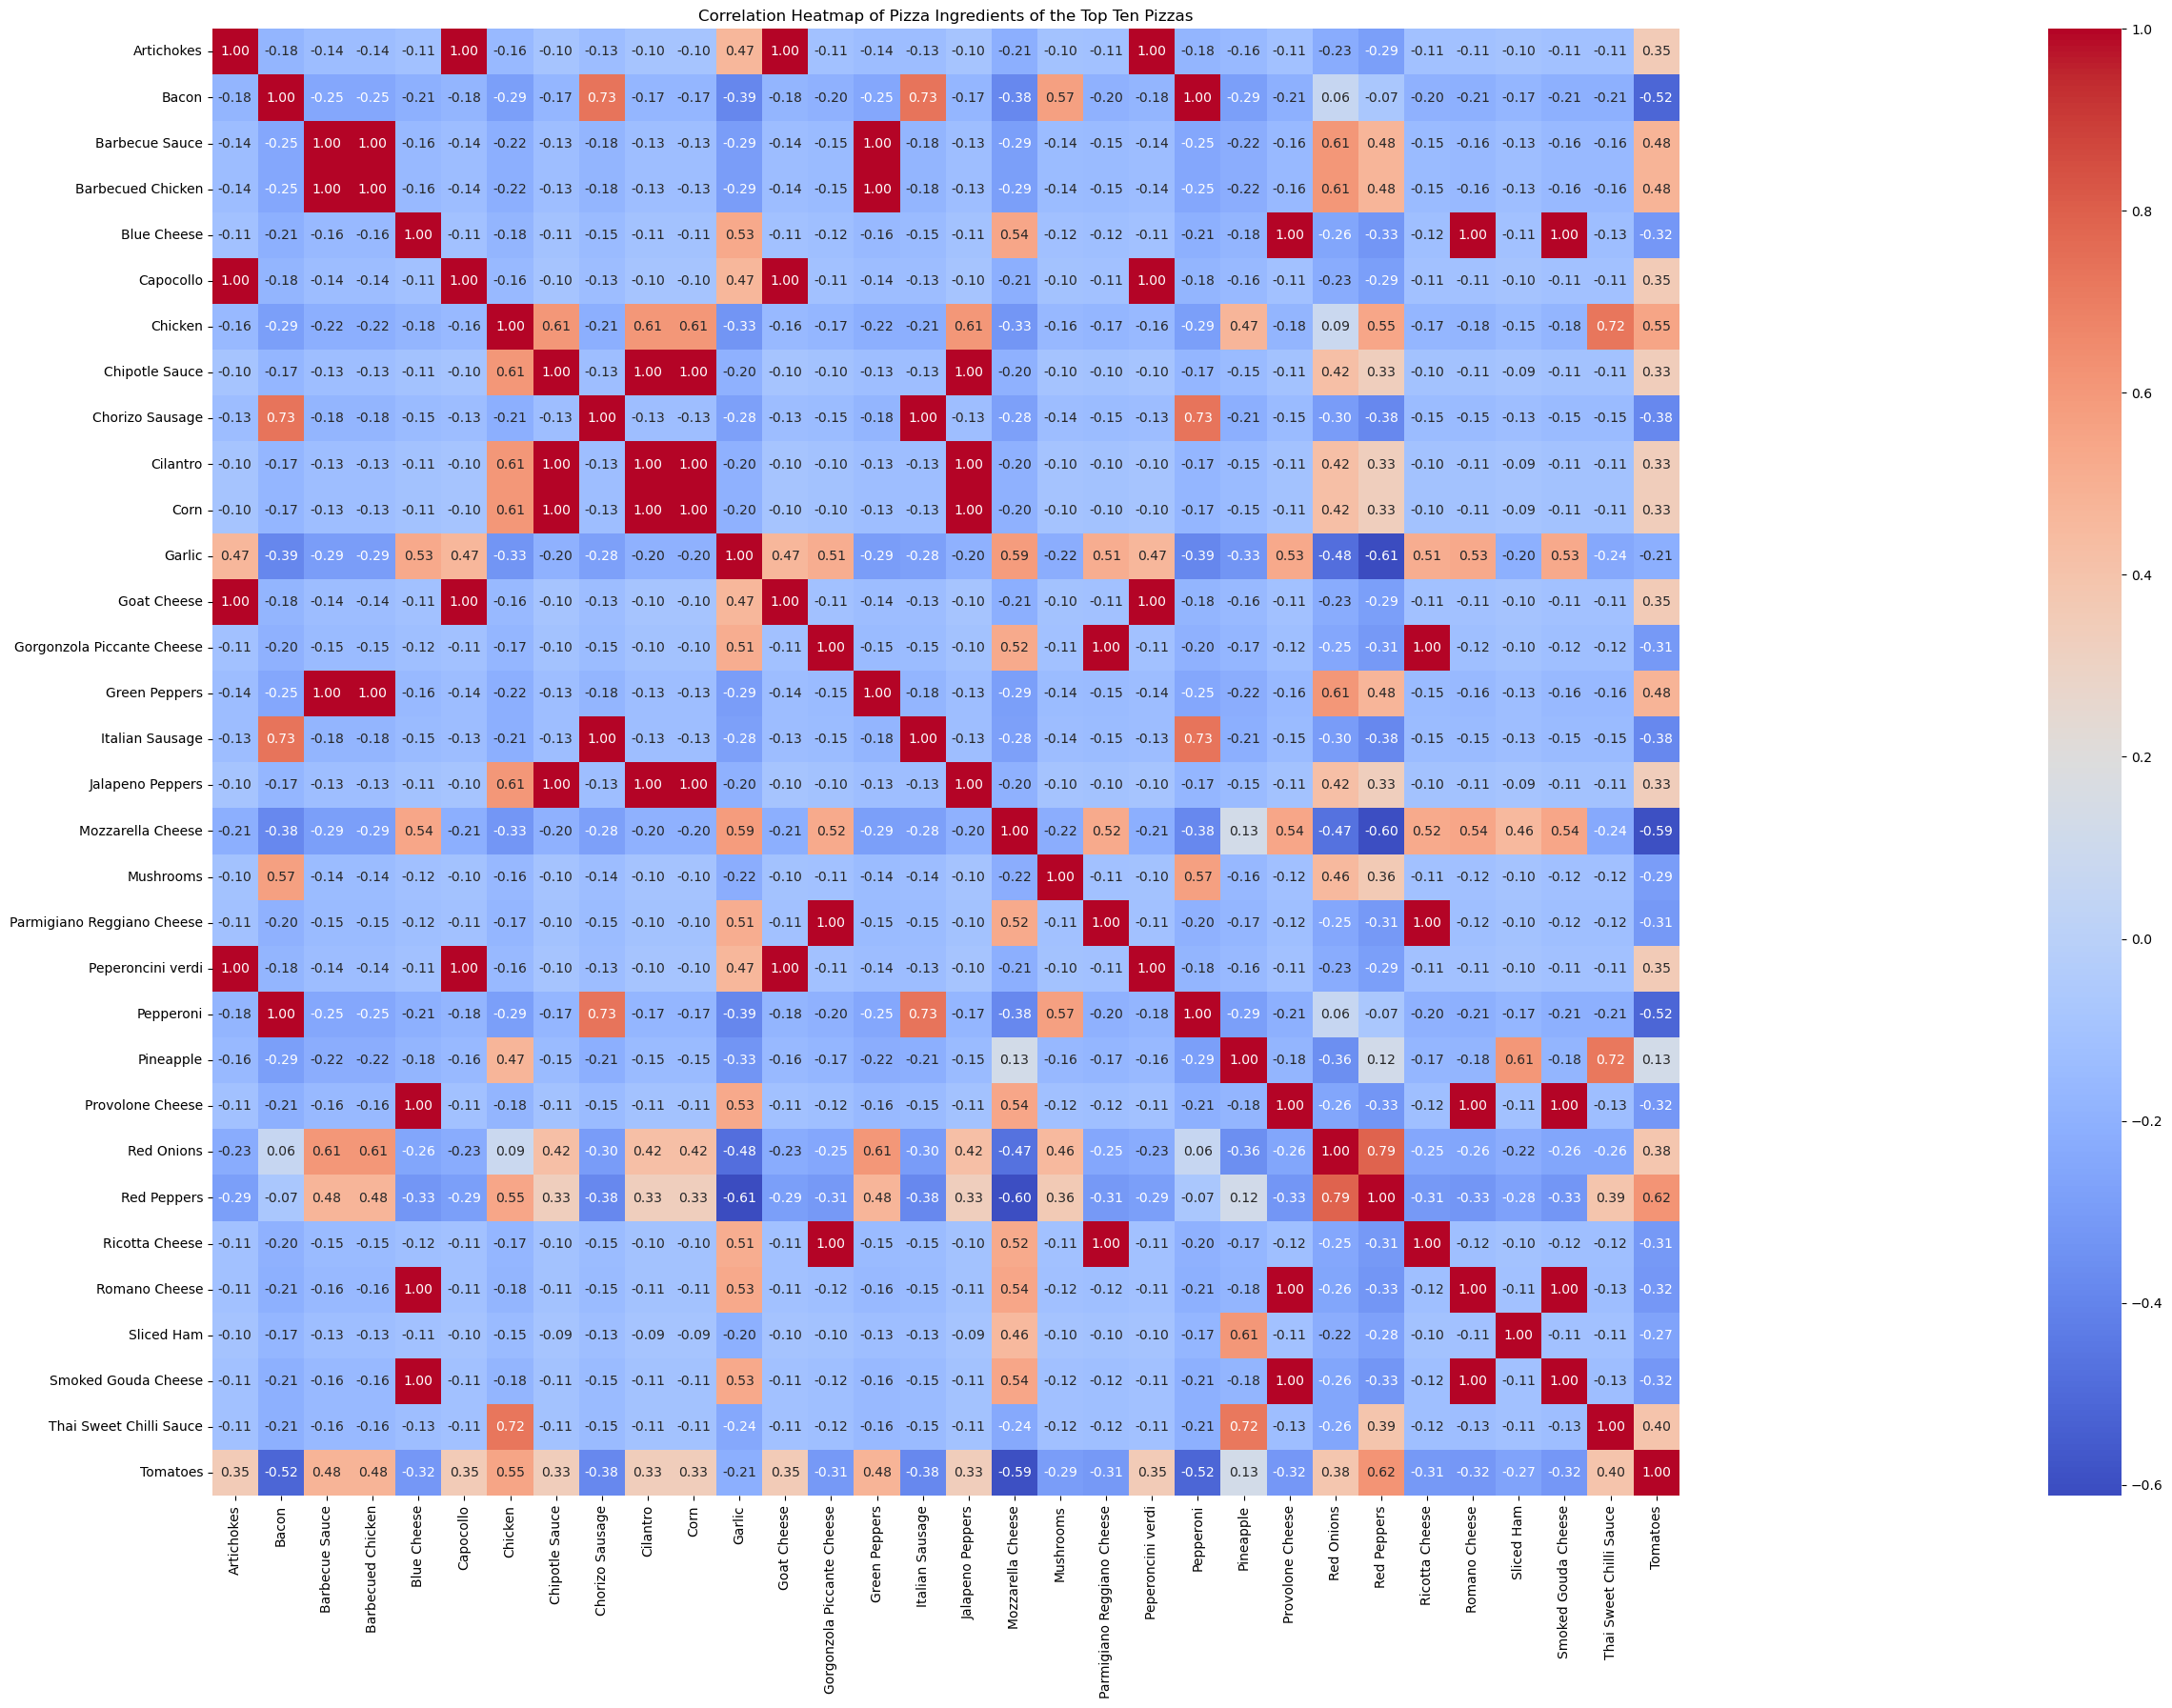

In [23]:
# 4. Recommendation System Development
# Show the correlation matrix with the ingredients
ingredient_dummies = top_ten_df['pizza_ingredients'].str.get_dummies(', ')

ingredient_corr = ingredient_dummies.corr()

plt.figure(figsize=(100, 20))
sns.heatmap(ingredient_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Pizza Ingredients of the Top Ten Pizzas')
plt.show()

In [24]:
# Algorithm that just get the bang for bucks
dataframe['num_ingredients'] = dataframe['pizza_ingredients'].apply(lambda x: len(x.split(', ')))
df_sorted = dataframe.sort_values(by='num_ingredients', ascending=False)

budget = 10
total_cost = 0
chosen_pizzas = []


for index, row in df_sorted.iterrows():
    if total_cost + row['total_price'] <= budget:
        chosen_pizzas.append(row['pizza_name'])
        total_cost += row['total_price']

print("Chosen Pizzas:")
for pizza in chosen_pizzas:
    print("-", pizza)
print("Total Cost: $", total_cost)

Chosen Pizzas:
- The Pepperoni Pizza
Total Cost: $ 9.75


In [25]:
# Using Bayes' therorem a machine learning that learns the pizza ingredients and their name
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(dataframe['pizza_ingredients'])
y = dataframe['pizza_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 1.0


In [26]:
# Show the pizza type and their ingrediants for information
for index, row in dataframe.iterrows():
    print("Pizza Name:", row['pizza_name'])
    print("Ingredients:", row['pizza_ingredients'])
    print()

Pizza Name: The Hawaiian Pizza
Ingredients: Sliced Ham, Pineapple, Mozzarella Cheese

Pizza Name: The Classic Deluxe Pizza
Ingredients: Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon

Pizza Name: The Five Cheese Pizza
Ingredients: Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic

Pizza Name: The Italian Supreme Pizza
Ingredients: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic

Pizza Name: The Mexicana Pizza
Ingredients: Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic

Pizza Name: The Thai Chicken Pizza
Ingredients: Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce

Pizza Name: The Italian Supreme Pizza
Ingredients: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic

Pizza Name: The Prosciutto and Arugula Pizza
Ingredients: Prosciutto di San Daniele, Arugula, Mozzarella Cheese

Pizza Name: The Italian Supreme Pizza
Ingredients: Cala

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pizza Name: The Southwest Chicken Pizza
Ingredients: Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce

Pizza Name: The Spicy Italian Pizza
Ingredients: Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic

Pizza Name: The California Chicken Pizza
Ingredients: Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese

Pizza Name: The Four Cheese Pizza
Ingredients: Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic

Pizza Name: The Pepperoni Pizza
Ingredients: Mozzarella Cheese, Pepperoni

Pizza Name: The Soppressata Pizza
Ingredients: Soppressata Salami, Fontina Cheese, Mozzarella Cheese, Mushrooms, Garlic

Pizza Name: The Italian Capocollo Pizza
Ingredients: Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano

Pizza Name: The Italian Supreme Pizza
Ingredients: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic

Pizza Nam

In [27]:
# With the machine learning model, input any ingredients and shows the pizza name for recommendation 
input_ingredients = ['Green Peppers', 'Peperoncini verdi', 'Chipotle Sauce', 'Goat Cheeses']

input_vector = vectorizer.transform([', '.join(input_ingredients)])

predicted_pizza_name = clf.predict(input_vector)[0]

print("Recommended Pizza:", predicted_pizza_name)

Recommended Pizza: The Pepperoni, Mushroom, and Peppers Pizza


In [28]:
# 5. Insights and Actionable Recommendations
# Looking at the data, we can see that people love to buy the small big meat pizza.
# As a business owner, I would stock more inventory for that type of pizza
# As a pizza lover, small big meat pizza is also afforable at 12.50 dollars on average
# Overall, it seems like people love classic and chicken pizza from the data

In [29]:
# 6. Conclusion and Future Work
# In conclusion, we can also look correlation matrix for the ingredients and see if we can develop any new pizza
# We see the correlation number to help us understand whether the ingredient will match